<a href="https://colab.research.google.com/github/amayaak78/Assignment1/blob/main/Amaya_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning packages
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# measure results
from sklearn.metrics import r2_score

# read csv dataset 
data = pd.read_csv("/content/car_age_price.csv")

In [107]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [108]:
data.shape

(112, 2)

In [109]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [111]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [112]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [113]:
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [114]:
data['Price'].value_counts

<bound method IndexOpsMixin.value_counts of 0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64>

In [115]:
data['Year'].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

In [116]:
data.head(2)

,Year,Price
0,2018,465000
1,2019,755000


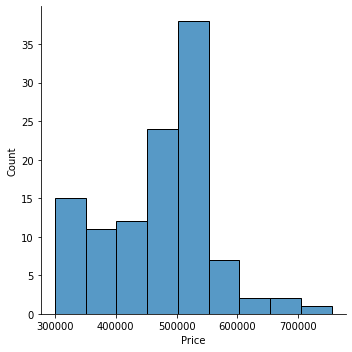

In [117]:
sns.displot(data['Price'])
plt.show()

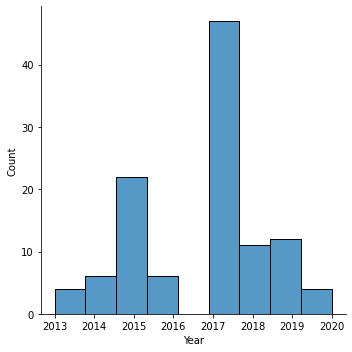

In [118]:
sns.displot(data['Year'])
plt.show()

In [121]:
data[data['Price']> 500000]

,Year,Price
1,2019,755000
2,2019,700000
7,2017,575000
8,2017,509999
9,2017,575000
13,2019,600000
17,2017,550000
23,2017,550000
24,2017,550000
25,2017,550000


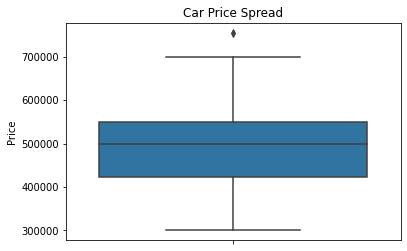

count       112.000000
mean     483866.044643
std       91217.450533
min      300000.000000
25%      423750.000000
50%      500000.000000
75%      550000.000000
max      755000.000000
Name: Price, dtype: float64


In [122]:
plt.title('Car Price Spread')
sns.boxplot(y=data.Price)
plt.show()
print(data.Price.describe())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


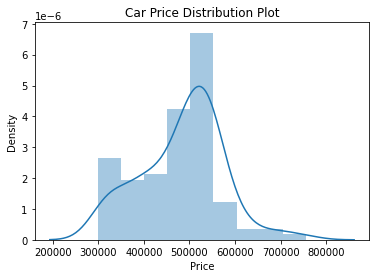

In [67]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.Price)
plt.show()

Conclusion

Which means that most of the prices offered by this company are low.

As seen below, we have 75% prices are around 16k, or 25% between 17k and 45k.

In [123]:
print(data.Price.describe())

count       112.000000
mean     483866.044643
std       91217.450533
min      300000.000000
25%      423750.000000
50%      500000.000000
75%      550000.000000
max      755000.000000
Name: Price, dtype: float64


*Find the best linear relationship between year and 
price.*

In [124]:
x = data['Year']
y = data['Price']

In [125]:
print(data.head())

   Year   Price
0  2018  465000
1  2019  755000
2  2019  700000
3  2018  465000
4  2018  465000


In [128]:
##Create an x variable with 200 observations that are normally distributed:
np.random.seed(29)
x = np.random.randn(200)

In [129]:
##Create a y variable that is linearly related to x with some added random noise:
y = x * 10 + np.random.randn(200) * 2

In [131]:
## Create a dataframe with the x and y variables:
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']

Text(0.5, 20.80000000000002, 'Year')

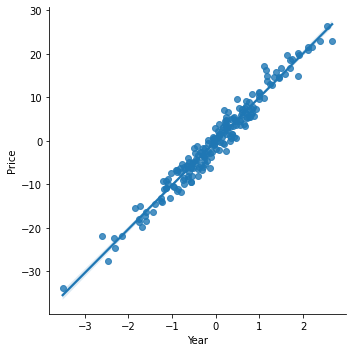

In [139]:
sns.lmplot(x="x", y="y", data=data, order=1)
plt.ylabel('Price')
plt.xlabel('Year')

In [140]:
## Build a linear regression model between x and y:
linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

Can you predict the possible price of a 2022 model second-hand grand i10?

In [142]:
## Make predictions of y using the fitted linear model:
predictions = linreg.predict(data['x'].to_frame())

##Calculate the price, that is, the difference between the predictions and the real outcome, y:
price = data['y'] - predictions

Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.


In [179]:
data_numeric = data.select_dtypes(include=['float', 'int'])
data_numeric.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [181]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [197]:
X = data.loc[:, ['Year']]

y = data['Price']

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [183]:
data_categorical = X.select_dtypes(include=['object'])
data_categorical.head()

""
0
1
2
3
4


In [187]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Price']]=scaler.fit_transform(X_train[['Year']])
X_train.head()

,Year,Price
28,0.193277,0.193277
33,0.193277,0.193277
22,-1.009334,-1.009334
23,0.193277,0.193277
54,0.193277,0.193277


In [193]:
X_test[['Price']]=scaler.transform(X_test[['Year']])
X_test.head()

,Year,Price
25,0.239182,0.239182
51,0.908893,0.908893
21,1.578604,1.578604
26,0.239182,0.239182
64,-1.100239,-1.100239


In [201]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [202]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001743,0.000588,0.001017,0.000085,0.0001,{'alpha': 0.0001},-32474.747882,-55598.107674,-50875.304218,-61825.755913,...,-47731.449721,10956.002474,28,-47902.728799,-42886.604825,-43265.374461,-41608.693096,-46094.228561,-44351.525948,2302.038449
1,0.001541,0.000196,0.000991,0.000071,0.001,{'alpha': 0.001},-32474.747885,-55598.107228,-50875.304329,-61825.755997,...,-47731.449672,10956.002437,27,-47902.728737,-42886.604814,-43265.374388,-41608.693044,-46094.228495,-44351.525896,2302.038440
2,0.001689,0.000189,0.001154,0.000165,0.01,{'alpha': 0.01},-32474.747910,-55598.102770,-50875.305441,-61825.756838,...,-47731.449185,10956.002062,26,-47902.728108,-42886.604710,-43265.373661,-41608.692521,-46094.227841,-44351.525368,2302.038353
3,0.001678,0.000137,0.001057,0.000031,0.05,{'alpha': 0.05},-32474.748026,-55598.082953,-50875.310386,-61825.760576,...,-47731.447019,10956.000395,25,-47902.725315,-42886.604243,-43265.370428,-41608.690201,-46094.224934,-44351.523024,2302.037969
4,0.001699,0.000241,0.001074,0.000031,0.1,{'alpha': 0.1},-32474.748170,-55598.058182,-50875.316566,-61825.765249,...,-47731.444312,10955.998312,24,-47902.721823,-42886.603660,-43265.366387,-41608.687300,-46094.221299,-44351.520094,2302.037488


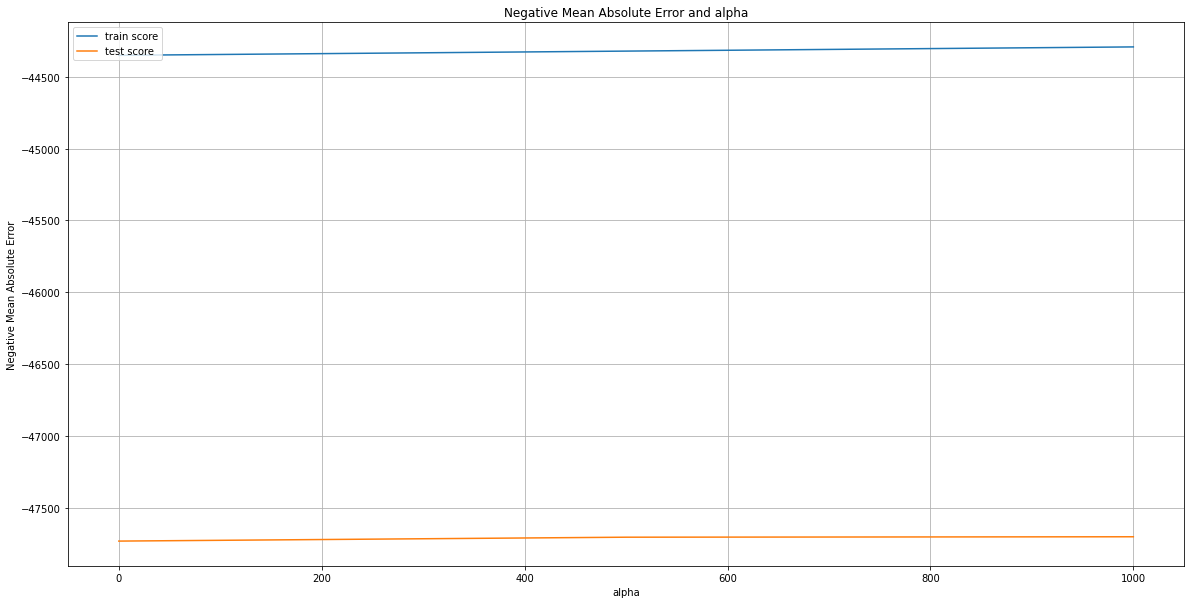

In [203]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [204]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([40203.21260116])

In [205]:
imp_lasso = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": lasso.coef_})
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
0,Year,40203.212601


In [206]:
imp_lasso =imp_lasso[imp_lasso['Coefficient'] !=0]
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
0,Year,40203.212601


In [207]:
y_pred = lasso.predict(X_test)

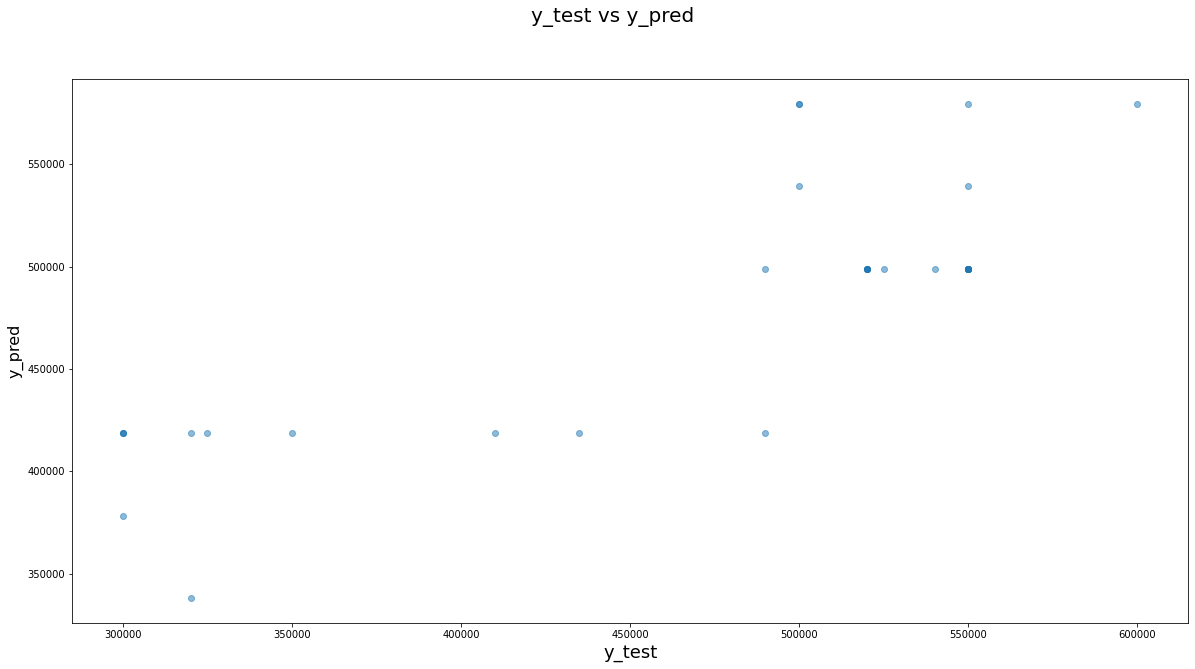

In [208]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [209]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
25,550000,499006.02
51,550000,539209.23
21,500000,579412.45
26,550000,499006.02
64,490000,418599.60
